# Covid19 Vaccinations Analysis In Each Country
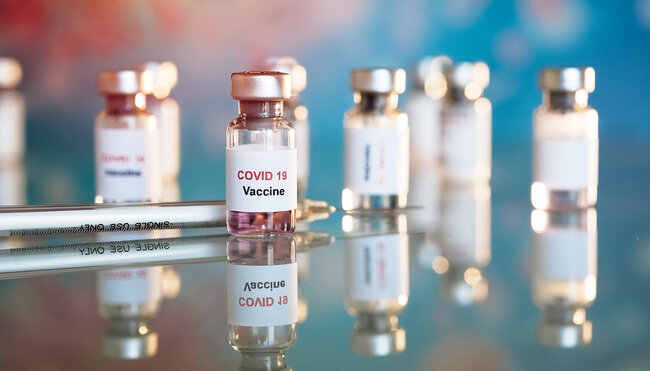

Kindly Upvote if you like the notebook and share possible improvements in the comments.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd
df = pd.read_csv('/kaggle/input/covid-world-vaccination-progress/country_vaccinations.csv')
df

In [ ]:
df.isnull().sum()

In [ ]:
df[df['iso_code'].isnull()]['country'].value_counts()

* In this case, the iso_code is an important information, we need to fill the NA.
* We use the pycountry library to fill the NA.Scotland, Norther Ireland, Wales, and England are part of United Kingdom,which is GBR.
* Northern Cyprus  is CYP.
* another missing data will be filled with 0.

In [ ]:
import pycountry


def do_fuzzy_search(country):
    try:
        result = pycountry.countries.search_fuzzy(country)
        return result[0].alpha_3
    except:
        return np.nan

In [ ]:
df['iso_code']= df["country"].apply(lambda country: do_fuzzy_search(country))

In [ ]:
#only Northern Cyprus can't transfer isocode.so use lambda x to change them.
df['iso_code']=df[['country', 'iso_code']].apply(lambda x: 'CYP' if (pd.isnull(x[1]))
                                             else x[1], axis=1)
df.fillna(0, inplace=True)

# Vaccine Types Used Per Country


* choose country, iso_code, vaccines, and total_vaccinations to make the chart.
* Use the chart to understand What vaccines are used and in which countries?

In [ ]:
#create new datafram which contains country、isocode and vaccine
vaccine_type = df[['country', 'iso_code' , 'vaccines', 'total_vaccinations']]
print(vaccine_type.isnull().sum())


In [ ]:
#Total number of vaccines used
vaccine_type = df[['country', 'iso_code' , 'vaccines', 'total_vaccinations']]
vaccine_total_number=vaccine_type.groupby('vaccines')['total_vaccinations'].sum().reset_index()
vaccine_total_number.sort_values('total_vaccinations', ascending=False).head(20)

In [ ]:
import plotly.express as px
vaccine_total_number = vaccine_total_number.sort_values('total_vaccinations', ascending=False).head(10)
fig = px.bar(vaccine_total_number, y='total_vaccinations', x='vaccines', color="total_vaccinations", text='total_vaccinations', title='Vaccines in Use Top 10', height=700)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

In [ ]:
#Differentiating the number of vaccines used by country
vaccine_type=vaccine_type.groupby(['vaccines', 'country', 'iso_code'])['total_vaccinations'].max().reset_index()
vaccine_type.sort_values('total_vaccinations', ascending=False)
vaccine_type[vaccine_type['country']=='United States']

In [ ]:
import plotly.express as px
import pandas as pd

fig = px.choropleth(vaccine_type, locations="iso_code", 
                    locationmode='ISO-3',
                    color="vaccines", 
                    hover_name="country", 
                    hover_data=['total_vaccinations']
                   )
fig.update_layout(title_text='Vaccine Preference by Country')
fig.show()

# Total Vaccines Per Country

* choose country, iso_code, and total_vaccinations to make the chart.
* Use the chart to understand What country is vaccinated more people?

In [ ]:
total=df.groupby(['country', 'iso_code'])['total_vaccinations'].max().reset_index()
total.sort_values('total_vaccinations', ascending=False)

In [ ]:
import plotly.express as px
total = total.sort_values('total_vaccinations', ascending=False).head(20)
fig = px.bar(total, y='total_vaccinations', x='country', color="total_vaccinations", text='total_vaccinations', title="Total accinations Top 20 Country", height =600)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

In [ ]:
import plotly.graph_objects as go
import pandas as pd
fig = go.Figure(data=go.Choropleth(
    locations = total['iso_code'],
    z = total['total_vaccinations'].astype(float),
    text = total['country'],
    colorscale = 'Jet',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.05,
    colorbar_tickprefix = '',
    colorbar_title = 'total_vaccinations',
))

fig.update_layout(
    title_text='Total vaccinations by each country',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=1,
        y=1,
        xref='paper',
        yref='paper',
        showarrow = False
    )]
)

fig.show()

# People Vaccinated Per Country

In [ ]:
total_people=df.groupby(['country', 'iso_code'])['people_vaccinated'].max().reset_index()
total_people.sort_values('people_vaccinated', ascending=False)

In [ ]:
import plotly.express as px
total_people = total_people.sort_values('people_vaccinated', ascending=False).head(20)
fig = px.bar(total_people, y='people_vaccinated', x='country', color_discrete_sequence =['green']*len(total_people), text='people_vaccinated', title="People Vaccinated Top 20 Country")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

In [ ]:
import plotly.graph_objects as go
import pandas as pd
fig = go.Figure(data=go.Choropleth(
    locations = total_people['iso_code'],
    z = total_people['people_vaccinated'].astype(float),
    text = total_people['country'],
    colorscale = 'Greens',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.05,
    colorbar_tickprefix = '',
    colorbar_title = 'total_vaccinations',
))

fig.update_layout(
    title_text='People Vaccinated by each country',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=1,
        y=1,
        xref='paper',
        yref='paper',
        showarrow = False
    )]
)

fig.show()

# Larger Percent From Population of Country
* choose country, iso_code, and people_fully_vaccinated_per_hundred to make the chart.
* Use the chart to understand What country is vaccinated a larger percent from its population?

In [ ]:
total_vaccinated_per=df.groupby(['country', 'iso_code'])['people_fully_vaccinated_per_hundred'].max().reset_index()
total_vaccinated_per.sort_values('people_fully_vaccinated_per_hundred', ascending=False)

In [ ]:
import plotly.express as px
total_vaccinated_per = total_vaccinated_per.sort_values('people_fully_vaccinated_per_hundred', ascending=False).head(20)
fig = px.bar(total_vaccinated_per, y='people_fully_vaccinated_per_hundred', x='country', color_discrete_sequence =['teal']*len(total_vaccinated_per), text='people_fully_vaccinated_per_hundred', title="People Fully Vaccinated Per Hundred Top 20 Country", height=700)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

In [ ]:
import plotly.graph_objects as go
import pandas as pd
fig = go.Figure(data=go.Choropleth(
    locations = total_vaccinated_per['iso_code'],
    z = total_vaccinated_per['people_fully_vaccinated_per_hundred'].astype(float),
    text = total_vaccinated_per['country'],
    colorscale = 'tealrose',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.05,
    colorbar_tickprefix = '',
    colorbar_title = 'people_fully_vaccinated_per_hundred',
))

fig.update_layout(
    title_text='Larger Percent From Population of Country',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=1,
        y=1,
        xref='paper',
        yref='paper',
        showarrow = False
    )]
)

fig.show()

In [ ]:
data = pd.read_csv('/kaggle/input/covid-world-vaccination-progress/country_vaccinations.csv')

import pycountry


def do_fuzzy_search(country):
    try:
        result = pycountry.countries.search_fuzzy(country)
        return result[0].alpha_3
    except:
        return np.nan
    
data['iso_code']= data["country"].apply(lambda country: do_fuzzy_search(country))
data['iso_code']= data[['country', 'iso_code']].apply(lambda x: 'CYP' if (pd.isnull(x[1]))
                                             else x[1], axis=1)



In [ ]:
data.isnull().sum()

In [ ]:
#total_vaccinations is comulative number where NA means didn't record, so we need to drop it.
# Drop all rows with NaNs in total_vaccinations.
data = data.dropna(subset=['total_vaccinations'])
data[data['country'] == 'United States']
data.sort_values('date', inplace=True)


In [ ]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date', ascending=True)
df['date'] = df['date'].dt.strftime('%m-%d-%Y')

In [ ]:
data

In [ ]:
#create the figure 

figure = px.line(data, x='date', y='total_vaccinations', color='country', template='plotly_dark', text='total_vaccinations', title= 'Total Vaccinations by Country')

figure.show()

# COVID-19 World Vaccination Progress Per Region

* first you have to add the new column 'continent'.
* make iso 2 change to continent with pycountry-convert library.

In [ ]:
pip install pycountry-convert

In [ ]:
def do_fuzzy_search(country):
    try:
        result = pycountry.countries.search_fuzzy(country)
        return result[0].alpha_2
    except:
        return np.nan
    
data['iso2_code']= data["country"].apply(lambda country: do_fuzzy_search(country))

In [ ]:
data[data['iso2_code'].isnull()]['country'].value_counts()

In [ ]:
data['iso2_code'] = data[['country', 'iso2_code']].apply(lambda x: 'CY' if x[0] == 'Northern Cyprus'
                                                         else 'FO' if x[0] == 'Faeroe Islands'
                                                         else x[1], axis=1)

import pycountry_convert as pc
def convert(row):
    conti_code = pc.country_alpha2_to_continent_code(row.iso2_code)
    return conti_code
data['continent'] = data.apply(convert, axis=1)
data

* Europe

In [ ]:
data_EU = data[data['continent']=='EU']
figure = px.line(data_EU, x='date', y='total_vaccinations', color='country', template='plotly_dark', text='total_vaccinations', title= 'Total Vaccinations EU')

figure.show()

In [ ]:
data_EU_max_total_vacci = data_EU.groupby(['country', 'iso_code'])['total_vaccinations'].max().reset_index()

In [ ]:
data_EU_max_total_vacci_top20 = data_EU_max_total_vacci.sort_values('total_vaccinations', ascending=False).head(20)
fig = px.bar(data_EU_max_total_vacci_top20, y='total_vaccinations', x='country', color="total_vaccinations", text='total_vaccinations', title="Total accinations Top 20 EU", height =600)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

In [ ]:
fig = go.Figure(data=go.Choropleth(
    locations = data_EU_max_total_vacci['iso_code'],
    z = data_EU_max_total_vacci['total_vaccinations'].astype(float),
    text = data_EU_max_total_vacci['country'],
    colorscale = 'bluyl',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.05,
    colorbar_tickprefix = '',
    colorbar_title = 'total_vaccinations',
))

fig.update_layout(
    title_text='Total vaccinations by each country in Europe',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=1,
        y=1,
        xref='paper',
        yref='paper',
        showarrow = False
    )]
)

fig.show()

* Asian

In [ ]:
data_AS = data[data['continent']=='AS']
figure = px.line(data_AS, x='date', y='total_vaccinations', color='country', template='plotly_dark', title= 'Total Vaccinations ASIAN')


figure.show()

In [ ]:
data_AS_max_total_vacci = data_AS.groupby(['country', 'iso_code'])['total_vaccinations'].max().reset_index()
data_AS_max_total_vacci_top20 = data_AS_max_total_vacci.sort_values('total_vaccinations', ascending=False).head(20)
fig = px.bar(data_AS_max_total_vacci_top20, y='total_vaccinations', x='country', color="total_vaccinations", text='total_vaccinations', title="Total accinations Top 20 ASIAN", height =600)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

In [ ]:
fig = go.Figure(data=go.Choropleth(
    locations = data_AS_max_total_vacci['iso_code'],
    z = data_AS_max_total_vacci['total_vaccinations'].astype(float),
    text = data_AS_max_total_vacci['country'],
    colorscale = 'brwnyl',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.05,
    colorbar_tickprefix = '',
    colorbar_title = 'total_vaccinations',
))

fig.update_layout(
    title_text='Total vaccinations by each country in Asian',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=1,
        y=1,
        xref='paper',
        yref='paper',
        showarrow = False
    )]
)

fig.show()

* North America

In [ ]:
data_NA = data[data['continent']=='NA']
figure = px.line(data_NA, x='date', y='total_vaccinations', color='country', template='plotly_dark', title= 'Total Vaccinations North America')


figure.show()

In [ ]:
data_NA_max_total_vacci = data_NA.groupby(['country', 'iso_code'])['total_vaccinations'].max().reset_index()
data_NA_max_total_vacci_top20 = data_NA_max_total_vacci.sort_values('total_vaccinations', ascending=False).head(20)
fig = px.bar(data_NA_max_total_vacci_top20, y='total_vaccinations', x='country', color="total_vaccinations", text='total_vaccinations', title="Total accinations Top 20 North America", height =600)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

In [ ]:
fig = go.Figure(data=go.Choropleth(
    locations = data_NA_max_total_vacci['iso_code'],
    z = data_NA_max_total_vacci['total_vaccinations'].astype(float),
    text = data_NA_max_total_vacci['country'],
    colorscale = 'plasma',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.05,
    colorbar_tickprefix = '',
    colorbar_title = 'total_vaccinations',
))

fig.update_layout(
    title_text='Total vaccinations by each country in North America',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=1,
        y=1,
        xref='paper',
        yref='paper',
        showarrow = False
    )]
)

fig.show()

* South America

In [ ]:
data_SA = data[data['continent']=='SA']
figure = px.line(data_SA, x='date', y='total_vaccinations', color='country', template='plotly_dark', title= 'Total Vaccinations South America')


figure.show()

In [ ]:
data_SA_max_total_vacci = data_SA.groupby(['country', 'iso_code'])['total_vaccinations'].max().reset_index()
data_SA_max_total_vacci_top20 = data_SA_max_total_vacci.sort_values('total_vaccinations', ascending=False).head(20)
fig = px.bar(data_SA_max_total_vacci_top20, y='total_vaccinations', x='country', color="total_vaccinations", text='total_vaccinations', title="Total accinations Top 20 South America", height =600)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

In [ ]:
fig = go.Figure(data=go.Choropleth(
    locations = data_SA_max_total_vacci['iso_code'],
    z = data_SA_max_total_vacci['total_vaccinations'].astype(float),
    text = data_SA_max_total_vacci['country'],
    colorscale = 'twilight',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.05,
    colorbar_tickprefix = '',
    colorbar_title = 'total_vaccinations',
))

fig.update_layout(
    title_text='Total vaccinations by each country in South America',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=1,
        y=1,
        xref='paper',
        yref='paper',
        showarrow = False
    )]
)

fig.show()

* Africa

In [ ]:
data_AF = data[data['continent']=='AF']
figure = px.line(data_AF, x='date', y='total_vaccinations', color='country', template='plotly_dark', title= 'Total Vaccinations Africa')


figure.show()

In [ ]:
data_AF_max_total_vacci = data_AF.groupby(['country', 'iso_code'])['total_vaccinations'].max().reset_index()
data_AF_max_total_vacci_top20 = data_AF_max_total_vacci.sort_values('total_vaccinations', ascending=False).head(20)
fig = px.bar(data_AF_max_total_vacci_top20, y='total_vaccinations', x='country', color="total_vaccinations", text='total_vaccinations', title="Total accinations Top 20 Africa", height =600)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

In [ ]:
fig = go.Figure(data=go.Choropleth(
    locations = data_AF_max_total_vacci['iso_code'],
    z = data_AF_max_total_vacci['total_vaccinations'].astype(float),
    text = data_AF_max_total_vacci['country'],
    colorscale = 'oranges',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.05,
    colorbar_tickprefix = '',
    colorbar_title = 'total_vaccinations',
))

fig.update_layout(
    title_text='Total vaccinations by each country in Africa',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=1,
        y=1,
        xref='paper',
        yref='paper',
        showarrow = False
    )]
)

fig.show()

In [ ]:
data['continent'].unique()

In [ ]:

data_EU_max_total_vacci = data_EU.groupby(['country', 'iso_code'])['total_vaccinations'].max().reset_index()

# COVID-19 Dashboard
* An Interactive visualization to show geographical heat map
* But in the kaggle it can't work, maybe you can use it by Jupter notebook.

In [ ]:
!pip install dash
!pip install jupyter-dash
#Dashboard
import pandas as pd 
import numpy as np
import dash
import dash_table
from dash.dependencies import Input, Output
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objs as go
from jupyter_dash import JupyterDash

total_newdata=df.groupby(['country', 'iso_code'])['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated'].max().reset_index()
total_newdata.sort_values('total_vaccinations', ascending=False)

#make dashboard
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app= JupyterDash(__name__, external_stylesheets=external_stylesheets)

app.title= 'Covid19 data in any Country'
    
app.layout= html.Div([
        html.Div([
            html.H1('Covid19 data in any Country')],
            style={'textAlign': 'center', 'padding-bottom': '30'}
        ),
        html.Div([html.Span('Metric to display:', className='eight columns',
                             style={'text-align': 'right', 'width': '40%', 'padding-top': 10}),
                  dcc.Dropdown(id='value-selected', value= 'total_vaccinations',
                               options=[{'label': 'total_vaccinations', 'value': 'total_vaccinations'},
                                        {'label': 'people_vaccinated', 'value': 'people_vaccinated'},
                                        {'label': 'people_fully_vaccinated','value': 'people_fully_vaccinated'}],
                               style={'display': 'black', 'margin-left': 'auto', 'margin-right': 'auto',
                                      'width': '70%'},
                               className='eight columns')], className='row'),
        dcc.Graph(
            id='my-graph')
        ], className='container')

@app.callback(
    dash.dependencies.Output("my-graph", "figure"),
    [dash.dependencies.Input("value-selected", "value")]
)
def update_figure(selected):
    total_newdata['hover_text'] = total_newdata['country'] + ':' + total_newdata[selected].apply(str)
    
    trace= go.Choropleth(locations= total_newdata['country_code'], z=np.log(total_newdata[selected]),
                        text= total_newdata['hover_text'],
                        hoverinfo= "text",
                        marker_line_color= 'white',
                        autocolorscale= False,
                        reversescale= True,
                        colorscale="RdBu",marker={'line': {'color': 'rgb(180,180,180)','width': 0.5}},
                        colorbar={"thickness": 10,"len": 0.3,"x": 0.9,"y": 0.7,
                                  'title': {"text": 'persons', "side": "bottom"},
                                  'tickvals': [ 2, 10],
                                  'ticktext': ['100', '100,000']})
    
    return {"data": [trace],
            "layout": go.Layout(height=800,geo={'showframe': False,'showcoastlines': False,
                                                                      'projection': {'type': "miller"}})}
if __name__ == '__main__':
    app.run_server(mode='inline')